## Import

In [173]:
#https://peopledoc.github.io/workalendar/basic.html
from datetime import date
from datetime import timedelta
from datetime import datetime
from calendar import monthrange
import matplotlib
#from calendra.europe import Sweden
import pandas as pd 




In [174]:

def calc_salary(month_df,name):
	from calendar import monthrange
	from datetime import date
	from datetime import datetime
	# julia
	month = month_df.head(1).index.month[0]
	year = month_df.head(1).index.year[0]
	num_days_in_month = monthrange(year,month)[1]

	if (name == 'julia'):
		salary_monthly = 31800
		parent_kr_per_day = ((salary_monthly*12*0.8*0.97))/365
		work_bonus_kr_per_day = ((salary_monthly*12*0.2*0.5))/365
		vacation_bonus_kr_per_day = (salary_monthly*0.0043)
		## variables
		num_effective_vacation_days = sum(month_df['vacation_j']*month_df['workday'])
		num_vacation_days = sum(month_df['vacation_j'])
		all_parent_days_list = month_df[['work_bonus_day_j','parent_day_j']].max(axis=1)
		deductable_from_salary_days = month_df[['work_bonus_day_j','parent_day_j','non_paid_j']].max(axis=1)
		num_parent_days = all_parent_days_list.sum()
		num_effective_parent_days = sum(all_parent_days_list.multiply(month_df['multi_j']))
		num_work_bonus_days = sum(month_df['work_bonus_day_j'])

	elif (name == 'filip'):
		salary_monthly = 48000
		bb_10 = 46500*10
		salary_over_10bb_yearly = (salary_monthly*12)-bb_10
		salary_below_10bb_yearly = salary_monthly*12 - salary_over_10bb_yearly
		work_bonus_kr_per_day = ((salary_below_10bb_yearly*0.2)+ (salary_over_10bb_yearly))/365
		parent_kr_per_day = ((salary_below_10bb_yearly*0.8*0.97))/365
		vacation_bonus_kr_per_day = (salary_monthly*0.0043)
		## variables
		num_effective_vacation_days = sum(month_df['vacation_f']*month_df['workday'])
		num_vacation_days = sum(month_df['vacation_f'])
		num_10_days = sum(month_df['10d_f'])
		all_parent_days_list = month_df[['work_bonus_day_f','parent_day_f','10d_f']].max(axis=1)
		deductable_from_salary_days = month_df[['work_bonus_day_f','parent_day_f','10d_f']].max(axis=1)
		num_parent_days = all_parent_days_list.sum() - num_10_days
		num_effective_parent_days = sum(all_parent_days_list.multiply(month_df['multi_f']))
		num_work_bonus_days = sum(month_df['work_bonus_day_f'])

	#num_p_julia = sum(month_df['parent_day_j'])
	
	# decide removal of salary
	if (sum(deductable_from_salary_days)==num_days_in_month):
		remove_from_salary = salary_monthly
	else:
		remove_from_salary = ((salary_monthly*12)/365)*sum(deductable_from_salary_days)
	#decide money from FK
	salary_from_work = salary_monthly - remove_from_salary
	from_fk = parent_kr_per_day*num_effective_parent_days
	from_work_bonus = num_work_bonus_days*work_bonus_kr_per_day
	from_vacation_bonus = num_effective_vacation_days*vacation_bonus_kr_per_day
	total_salary = from_fk + from_work_bonus + salary_from_work + from_vacation_bonus
	output = {}
	output['from_work_bonus'] = from_work_bonus
	output['from_fk'] = from_fk
	output['salary_from_work'] = salary_from_work
	output['total_salary'] = total_salary
	output['month'] = date(year,month,1)
	output['num_effective_vacation_days'] = num_effective_vacation_days
	output['num_effective_parent_days'] = num_effective_parent_days
	output['num_vacation_days'] = num_vacation_days
	output['num_parent_days'] = num_parent_days
	output['num_work_bonus_days'] = num_work_bonus_days
	output['salary_from_work'] = salary_from_work
	output['num_days_off'] = num_vacation_days + num_parent_days
	output['name'] = name
	return output



In [175]:
def calc_all(filename):
    data = pd.read_csv(filename,sep=';')
    data = data.fillna(0)
    data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
    data = data.set_index('date_')
    startyear = 2019
    startmonth = 5
    endyear = 2021
    endmonth = 1
    all_months = [date(m//12, m%12+1, 1) for m in range(startyear*12+startmonth-1, endyear*12+endmonth)]
    list_of_output = []
    for i in all_months:
        month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
        filip_output = calc_salary(month_df,'filip')
        julia_output = calc_salary(month_df,'julia')
        list_of_output.append(filip_output)
        list_of_output.append(julia_output)
    df = pd.DataFrame.from_dict(list_of_output)
    #df.to_csv('out.csv',index=False)
    return df


In [176]:
df1 = calc_all("input_1.csv")
df1 = df1.groupby(['month']).sum()
df1['version'] = 'version_1'

df2 = calc_all("input_2.csv")
df2 = df2.groupby(['month']).sum()
df2['version'] = 'version_2'

df3 = calc_all("input_3.csv")
df3 = df3.groupby(['month']).sum()
df3['version'] = 'version_3'

df4 = calc_all("input_4.csv")
df4 = df4.groupby(['month']).sum()
df4['version'] = 'version_4'

df_tmp1 = df1.append(df2)
df_tmp2 = df_tmp1.append(df3)
df = df_tmp2.append(df4)
df = df.reset_index()

In [177]:
#df.pivot_table(index='version',aggfunc=sum, fill_value=0).T
pd.options.display.float_format = '{:.0f}'.format
df.groupby(['version']).sum()[['from_fk','from_work_bonus','salary_from_work','total_salary','num_effective_parent_days','num_effective_vacation_days','num_days_off','num_parent_days','num_vacation_days','num_work_bonus_days']].T


version,version_1,version_2,version_3,version_4
from_fk,313932,325803,254641,264234
from_work_bonus,119630,112538,112538,111597
salary_from_work,854257,846242,846242,825766
total_salary,1298039,1296182,1225020,1214022
num_effective_parent_days,344,358,270,280
num_effective_vacation_days,62,67,67,71
num_days_off,732,750,750,771
num_parent_days,619,630,630,645
num_vacation_days,113,120,120,126
num_work_bonus_days,362,355,355,346


In [178]:
data = pd.read_csv("input_4.csv",sep=';')
data = data.fillna(0)
data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
data = data.set_index('date_')
i = date(2019,8,1)
month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
calc_salary(month_df,'filip')


{'from_fk': 17794.849315068492,
 'from_work_bonus': 0.0,
 'month': datetime.date(2019, 8, 1),
 'name': 'filip',
 'num_days_off': 18.0,
 'num_effective_parent_days': 18.0,
 'num_effective_vacation_days': 0.0,
 'num_parent_days': 18.0,
 'num_vacation_days': 0.0,
 'num_work_bonus_days': 0.0,
 'salary_from_work': 19594.520547945205,
 'total_salary': 37389.369863013693}

In [179]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from matplotlib.pyplot import figure

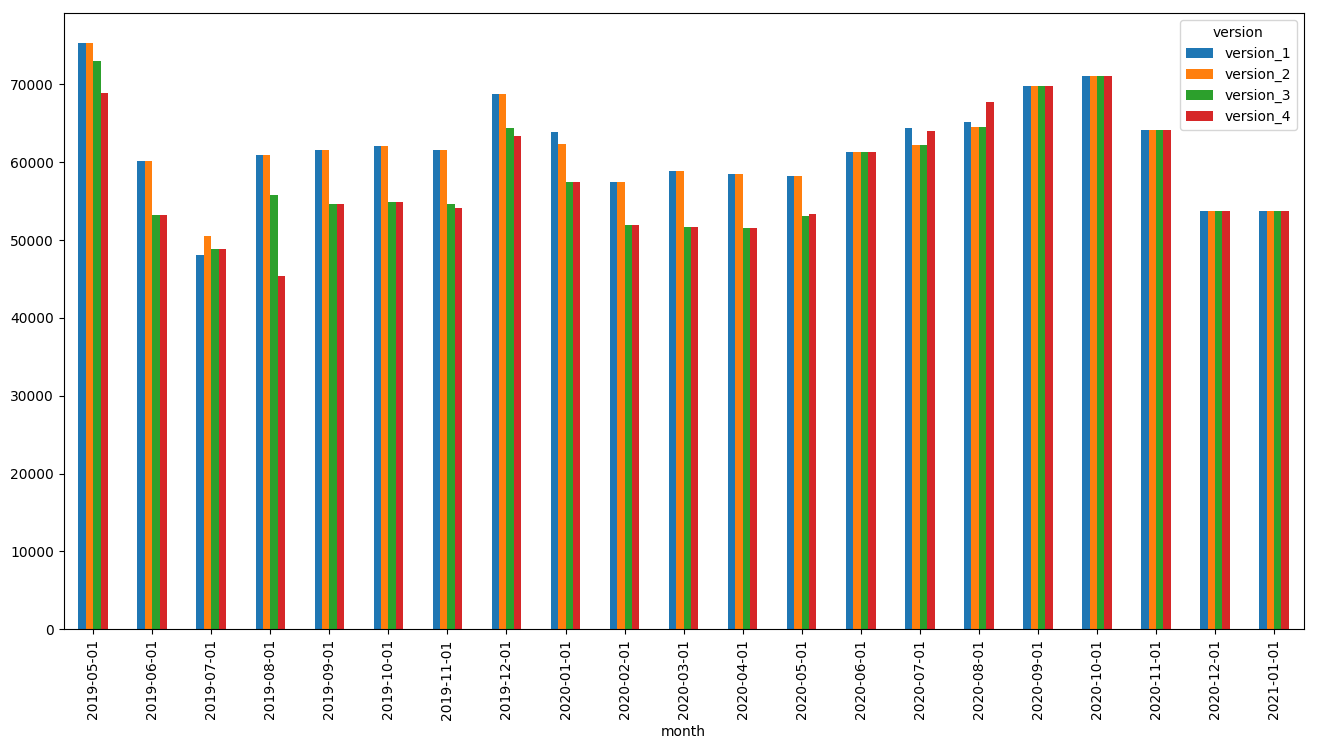

In [180]:
## plot totals between different versions
df.pivot(index='month', columns='version', values='total_salary').plot(kind='bar',figsize=(16,8))
plt.show()

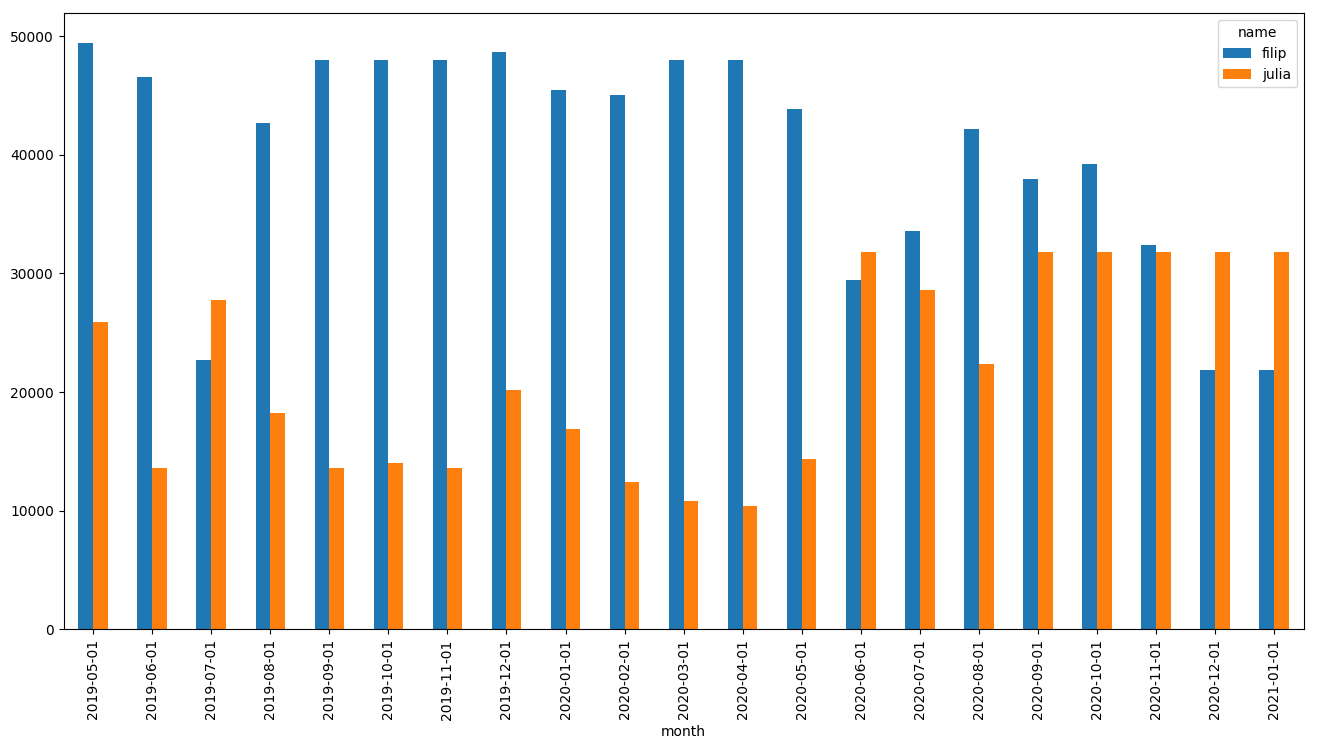

In [186]:
## plot diff between names in the same version
calc_all("input_2.csv").reset_index().pivot('month','name','total_salary').plot(kind='bar',figsize=(16,8))
plt.show()

In [ ]:
# ## plot calendar for one version

# events = data['multi_f']
# calmap.calendarplot(events, yearlabels=True)
# plt.show()


# Plot Calendar Map 

In [182]:
filename='input_4.csv'
data = pd.read_csv(filename,sep=';')
data = data.fillna(0)
data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
data = data.set_index('date_')
data['non_paid_f'] = 0

import calmap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



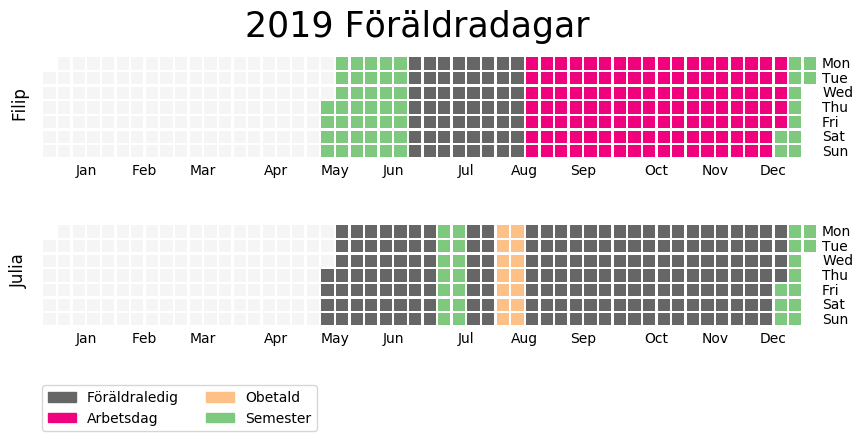

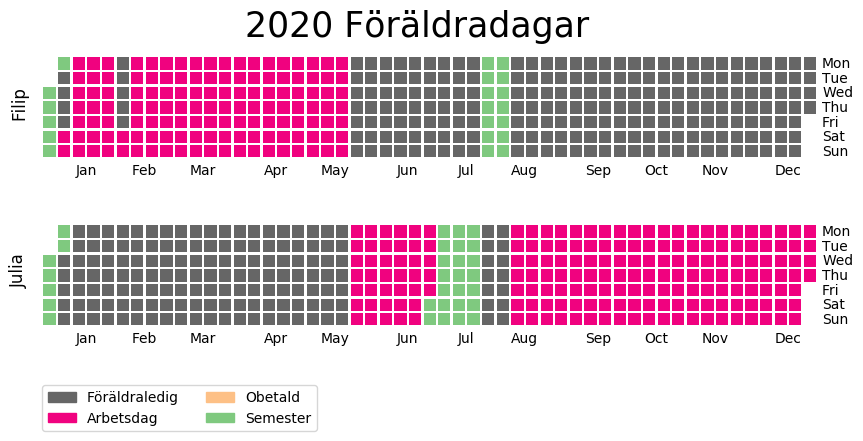

In [184]:
label_list = {
    'multi_f':'Föräldraledig'
    ,'work_f':'Arbetsdag'
    ,'non_paid_f':'Obetald'
    ,'vacation_f':'Semester'
}
cmap_name = 'Accent_r'
def cal_printer(x,name):
    if (name == 'filip'):
        if (x['work_f']>0):
            return 1
        elif (x['multi_f']>0):
            return 0
        elif (x['non_paid_f']>0):
            return 2
        elif (x['vacation_f']>0):
            return 3
    elif (name == 'julia'):
        if (x['work_j']>0):
            return 1
        elif (x['multi_j']>0):
            return 0
        elif (x['non_paid_j']>0):
            return 2
        elif (x['vacation_j']>0):
            return 3
        
cal_map_data_filip = data.apply(cal_printer, name='filip', axis=1)
cal_map_data_julia = data.apply(cal_printer, name='julia', axis=1)

## 2019
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(2,1,1)
ax = calmap.yearplot(cal_map_data_filip['2019-01-01':'2019-12-31'],year=2019,cmap=cmap_name)
ax.set_title("Filip",rotation='vertical',x=-0.03,y=0.5)
ax = fig.add_subplot(2,1,2)
ax = calmap.yearplot(cal_map_data_julia['2019-01-01':'2019-12-31'],year=2019,cmap=cmap_name)
ax.set_title("Julia",rotation='vertical',x=-0.03,y=0.5)
fig.suptitle('2019 Föräldradagar', x=0.5,y=0.95,fontsize=25)

#legend
patches = []
for index, (key, value) in enumerate(label_list.items()):
    cmap_col = matplotlib.cm.get_cmap(cmap_name,lut=len(label_list))(index)
    patches.append(mpatches.Patch(color=cmap_col, label=value))
plt.legend(handles=patches,bbox_to_anchor=(0., -1.02, 1., .102), loc=3,ncol=2, borderaxespad=0.)

plt.show()

fig.savefig('2019.png')

## 2020
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(2,1,1)
ax = calmap.yearplot(cal_map_data_filip['2020-01-01':'2020-12-31'],year=2020,cmap=cmap_name)
ax.set_title("Filip",rotation='vertical',x=-0.03,y=0.5)
ax = fig.add_subplot(2,1,2)
ax = calmap.yearplot(cal_map_data_julia['2020-01-01':'2020-12-31'],year=2020,cmap=cmap_name)
ax.set_title("Julia",rotation='vertical',x=-0.03,y=0.5)
fig.suptitle('2020 Föräldradagar', x=0.5,y=0.95,fontsize=25)

#legend
patches = []
for index, (key, value) in enumerate(label_list.items()):
    cmap_col = matplotlib.cm.get_cmap(cmap_name,lut=len(label_list))(index)
    patches.append(mpatches.Patch(color=cmap_col, label=value))
plt.legend(handles=patches,bbox_to_anchor=(0., -1.02, 1., .102), loc=3,ncol=2, borderaxespad=0.)

plt.show()

fig.savefig('2020.png')





### Julia Days Plot

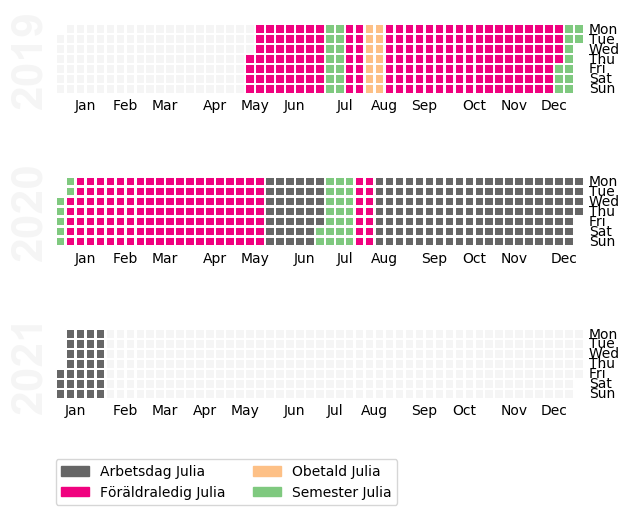

In [168]:
label_list = {
    'work_j':'Arbetsdag Julia'
    ,'multi_j':'Föräldraledig Julia'
    ,'non_paid_j':'Obetald Julia'
    ,'vacation_j':'Semester Julia'
}
cmap_name = 'Accent_r'
def cal_printer(x,):
    if (x['work_j']>0):
        return 0
    elif (x['multi_j']>0):
        return 1
    elif (x['non_paid_j']>0):
        return 2
    elif (x['vacation_j']>0):
        return 3

cal_map_data = data.apply(cal_printer ,axis=1)

fig,ax = calmap.calendarplot(cal_map_data, yearlabels=True, cmap=cmap_name)
#legend
patches = []
for index, (key, value) in enumerate(label_list.items()):
    cmap_col = matplotlib.cm.get_cmap(cmap_name,lut=len(label_list))(index)
    patches.append(mpatches.Patch(color=cmap_col, label=value))
plt.legend(handles=patches,bbox_to_anchor=(0., -1.52, 1., .102), loc=3,ncol=2, borderaxespad=0.)
plt.show()


### Filip Days Plot

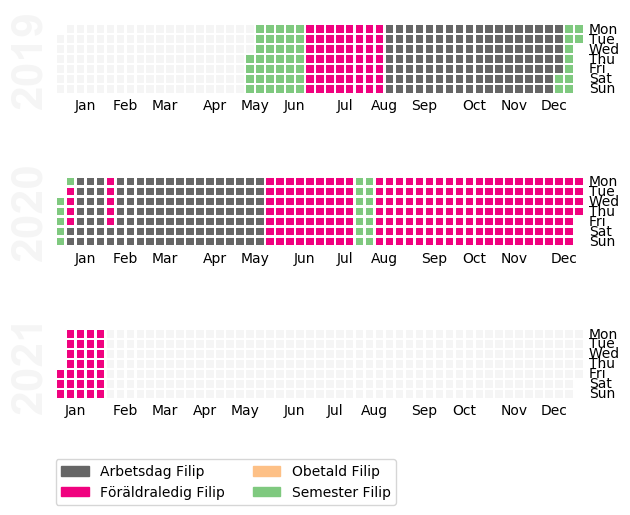

In [172]:
label_list = {
    'work_f':'Arbetsdag Filip'
    ,'multi_f':'Föräldraledig Filip'
    ,'non_paid_f':'Obetald Filip'
    ,'vacation_f':'Semester Filip'
}
cmap_name = 'Accent_r'
def cal_printer(x,):
    if (x['work_f']>0):
        return 0
    elif (x['multi_f']>0):
        return 1
    elif (x['non_paid_f']>0):
        return 2
    elif (x['vacation_f']>0):
        return 3

cal_map_data = data.apply(cal_printer ,axis=1)



fig,ax = calmap.calendarplot(cal_map_data, yearlabels=True, cmap=cmap_name)
#legend
patches = []
for index, (key, value) in enumerate(label_list.items()):
    cmap_col = matplotlib.cm.get_cmap(cmap_name,lut=len(label_list))(index)
    patches.append(mpatches.Patch(color=cmap_col, label=value))
plt.legend(handles=patches,bbox_to_anchor=(0., -1.52, 1., .102), loc=3,ncol=2, borderaxespad=0.)

plt.show()

